## Figures 4 familles

In [1]:
import pykasso as pk
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.patches as mp

In [2]:
catchment = pk.SKS('inputs/familles_frac.yaml') 
catchment.set_parameter('fractures_mode', 'random')  
catchment.update_feature('fractures') 

CAUTION: You are using the development version of this package.


Rasterizing: 100%|████████████████████████████████████████████████████████████████| 994/994 [00:00<00:00, 10608.33it/s]


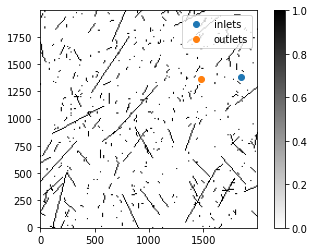

In [13]:
f = catchment.show_catchment(data_key='fractures')
#f.set_size_inches(20,20)

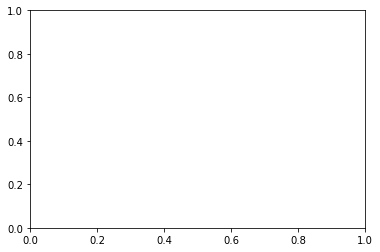

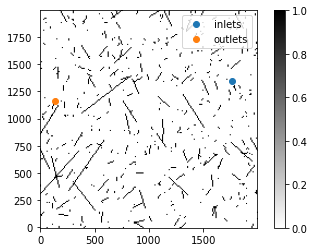

TypeError: Image data of dtype object cannot be converted to float

In [5]:
import matplotlib.patches as mp
fig, ax1 = plt.subplots()
        
data = catchment.show_catchment(data_key='fractures')

im1 = ax1.imshow(data, origin="lower", extent=catchment.grid.extent)
fig.colorbar(im1, ax=ax1)
ax1.set_aspect('equal', 'box')
plt.legend(loc='upper right')
plt.show()

In [7]:
data = catchment.karst_simulations[-1]
closed_polygon = catchment.mask.vertices[:]
#simulations
catchment.compute_karst_network()
#objet à définir pour la figure
data = catchment.karst_simulations[-1]
closed_polygon = catchment.mask.vertices[:]
#font = arial
plt.rcParams.update({'font.family':'Arial'})
#début de la figure
fig = plt.figure(figsize=(25,10))
fig.add_subplot(131, aspect='equal')
d = data.maps['cost'][-1]
d = np.transpose(d, (1,0))
closed_polygon = catchment.mask.vertices[:]
closed_polygon.append(closed_polygon[0])
x,y = zip(*closed_polygon)
plt.plot(x,y, color='red', label='mask')
i = plt.scatter(data.points['inlets'].x,  data.points['inlets'].y,  c='orange')
o = plt.scatter(data.points['outlets'].x, data.points['outlets'].y, c='steelblue')
p = matplotlib.patches.Rectangle((0,0),0,0, ec='r', fc='none')
fractures = mlines.Line2D([], [], color='black',
                          markersize=15, label='faults')
plt.imshow(d, extent=catchment.grid.extent, origin = 'lower', cmap='gray')
#plt.colorbar(shrink=0.5)
plt.legend([i,o,p,fractures], ['inlets', 'outlet', 'catchment','fractures'], loc='lower left',fontsize = 15)
plt.title('Input data',fontsize=16)
plt.show 

IndexError: list index out of range